# Multi Linear regression
By Caleb Erb-White

In [1]:
# our imports
import numpy as np
import pandas as pd
import sklearn.model_selection as sklmdl

In [2]:
# getting the dataset
# change the csv to your chosen csv
# data from : https://www.kaggle.com/maca11/all-pokemon-dataset/version/7
df = pd.read_csv("All_Pokemon.csv")
# displaying the first 10 entries
df.head(10)

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,...,1.00,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,...,1.00,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,...,1.00,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,...,1.00,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,...,0.50,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6
5,5,Charmeleon,Fire,NaN,"['Blaze', 'Solar Power']",58,64,58,80,65,...,0.50,2.0,1.0,1.0,1.0,0.5,0.5,1.1,19.0,15.7
6,6,Charizard,Fire,Flying,"['Blaze', 'Solar Power']",78,84,78,109,85,...,0.25,4.0,1.0,1.0,1.0,0.5,0.5,1.7,90.5,31.3
7,6,Mega Charizard Y,Fire,Flying,['Drought'],78,104,78,159,115,...,0.25,4.0,1.0,1.0,1.0,0.5,0.5,1.7,100.5,34.8
8,6,Mega Charizard X,Fire,Dragon,['Tough Claws'],78,130,111,130,85,...,0.50,2.0,1.0,2.0,1.0,0.5,1.0,1.7,110.5,38.2
9,7,Squirtle,Water,NaN,"['Rain Dish', 'Torrent']",44,48,65,50,64,...,1.00,1.0,1.0,1.0,1.0,0.5,1.0,0.5,9.0,36.0


In [3]:
# getting the number of entries
m = len(df)
m

1032

# Some initial plots to see possible relationships

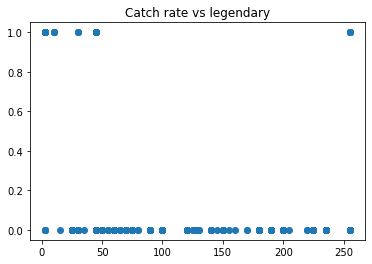

In [4]:
# catch rate vs legendary
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=df["Catch Rate"],y=df["Legendary"])
plt.title("Catch rate vs legendary")
plt.show()

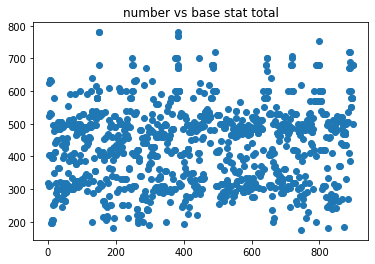

In [5]:
# number vs bst
plt.figure()
plt.scatter(x=df["Number"],y=df["BST"])
plt.title("number vs base stat total")
plt.show()

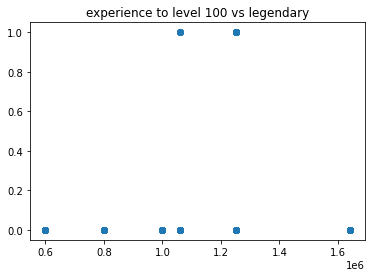

In [6]:
# experience to level 100 vs legendary
plt.figure()
plt.scatter(x=df["Experience to level 100"],y=df["Legendary"])
plt.title("experience to level 100 vs legendary")
plt.show()

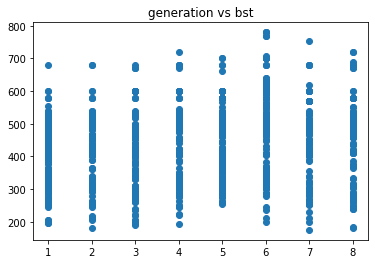

In [7]:
# generation vs bst
plt.figure()
plt.scatter(x=df["Generation"], y=df["BST"])
plt.title("generation vs bst")
plt.show()

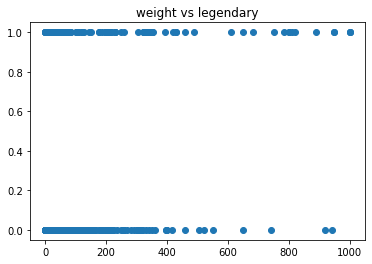

In [8]:
# weight vs legendary
plt.figure()
plt.scatter(x=df["Weight"],y=df["Legendary"])
plt.title("weight vs legendary")
plt.show()

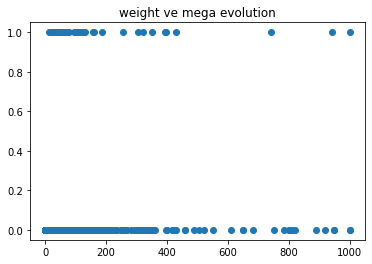

In [9]:
# weight vs mega evolution
plt.figure()
plt.scatter(x=df["Weight"],y=df["Mega Evolution"])
plt.title("weight ve mega evolution")
plt.show()

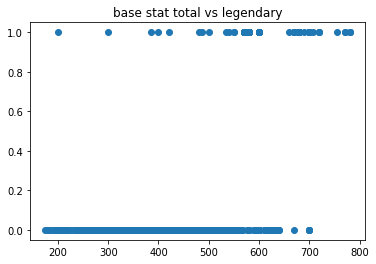

In [10]:
# bst vs legendary
plt.figure()
plt.scatter(x=df["BST"],y=df["Legendary"])
plt.title("base stat total vs legendary")
plt.show()

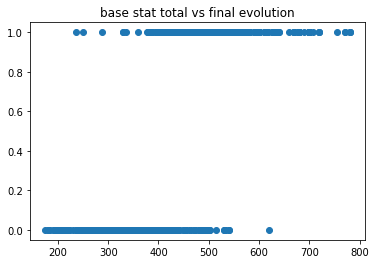

In [11]:
# bst vs final evolution
plt.figure()
plt.scatter(x=df["BST"],y=df["Final Evolution"])
plt.title("base stat total vs final evolution")
plt.show()

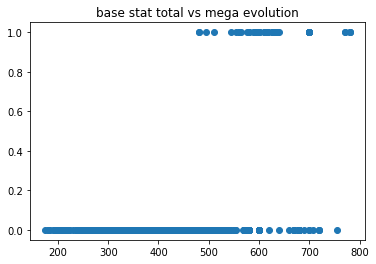

In [12]:
# best vs mega evolution
plt.figure()
plt.scatter(x=df["BST"],y=df["Mega Evolution"])
plt.title("base stat total vs mega evolution")
plt.show()

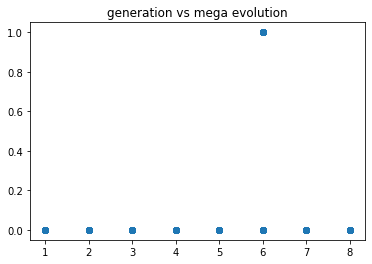

In [13]:
# generation vs mega evolution
plt.figure()
plt.scatter(x=df["Generation"], y=df["Mega Evolution"])
plt.title("generation vs mega evolution")
plt.show()

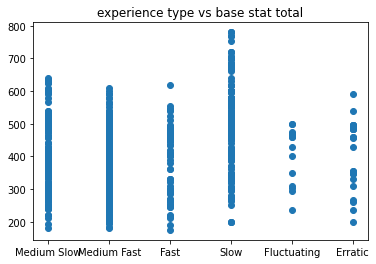

In [14]:
# experience type vs bst
plt.figure()
plt.scatter(x=df["Experience type"],y=df["BST"])
plt.title("experience type vs base stat total")
plt.show()

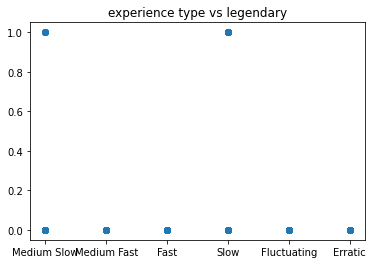

In [15]:
# experience type vs legendary
plt.figure()
plt.scatter(x=df["Experience type"],y=df["Legendary"])
plt.title("experience type vs legendary")
plt.show()

# Getting our output matrix

In [16]:
# replace with your own list of linear features of choice
y = df[["HP","Att","Def","Spa","Spd","Spe"]]
# displaying the first few entries
y.head()

,HP,Att,Def,Spa,Spd,Spe
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


# Building our input matrix

In [17]:
# counting types
types1 = list(df["Type 1"].unique())
types1.sort()
types1

['Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water']

In [18]:
# not all pokemon have a type 2
types2=[np.NAN]+types1
types2

[nan,
 'Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water']

In [19]:
# making a new dataframe with the types as ratios out of the max for that slot
typesdf = pd.DataFrame(np.zeros((m,2)),columns=['Type 1', 'Type 2'])
# convert each entry in the main df into the ratio
for row in range(m):
    type1 = df["Type 1"][row]
    typesdf.at[row,"Type 1"] = types1.index(type1)/(len(types1)-1)
    type2 = df["Type 2"][row]
    typesdf.at[row,"Type 2"] = types2.index(type2)/(len(types2)-1)
# showing the first few entries of our normalized types
typesdf.head()

,Type 1,Type 2
0,0.529412,0.777778
1,0.529412,0.777778
2,0.529412,0.777778
3,0.529412,0.777778
4,0.352941,0.000000


In [20]:
# counting abilities
# getting the total number of unique ability set lists
temp = df["Abilities"].unique()
# an array for unique abilities
abilities=[]
# finding unique abilities within the ability sets
for entry in temp:
    # evaluating the entry string to get a list object with abilities as strings
    templist = eval(entry)
    # going trough that list
    for item in templist:
        # adding an ability that is unseen
        if item not in abilities:
            abilities.append(item)
# show the total number of abilities
print(len(abilities))
# sort the abilities
abilities.sort()
# add none to the begining to account for pokemon with <3 abilities
abilities=[None]+abilities
# show the first 10 entries of our abilities list
abilities[:10]

264


[None,
 'Adaptability',
 'Aerilate',
 'Aftermath',
 'Air Lock',
 'Analytic',
 'Anger Point',
 'Anticipation',
 'Arena Trap',
 'Aroma Veil']

In [21]:
# making an abilities df of 3 columns full of ratios of types for those slots
abilitydf = pd.DataFrame(np.zeros((m,3)),columns=['Ability 1', 'Ability 2', 'Ability 3'])
# some pokemon have their hidden ability as ability 2
# i dont think it matters too much
for row in range(m):
    # get the abilities list like before
    entry = eval(df["Abilities"][row])
    # this was here to catch an error with the dataset
    try:
        # this adds theability as a ratio out of all abilities
        abilitydf.at[row,"Ability 1"] =abilities.index(entry[0])/(len(abilities)-1)
    except:
        # for some reason, mega secptile didnt have any abilities
        # i fixed that
        print(row)
    # if the pokemon has a second ability
    if len(entry) >= 2:
        abilitydf.at[row,"Ability 2"] =abilities.index(entry[1])/(len(abilities)-1)
    # if the pokemon has a third ability
    if len(entry) == 3:
        abilitydf.at[row,"Ability 3"] =abilities.index(entry[2])/(len(abilities)-1)
# displaying the first few entries of our normalized abilities
abilitydf.head()

,Ability 1,Ability 2,Ability 3
0,0.090909,0.534091,0.0
1,0.090909,0.534091,0.0
2,0.090909,0.534091,0.0
3,0.897727,0.000000,0.0
4,0.075758,0.772727,0.0


In [22]:
# making the experience type dataframe
# normalizing as a ratio like above
experiencedf = pd.DataFrame(np.zeros((m,1)),columns=["Experience type"])
# getting the number of experience types
# I know there are only 6, but this can be scalable
experiencelabels = list(df["Experience type"].unique())
# adding the ratio as entries to the new df
for row in range(m):
    entry = df["Experience type"][row]
    experiencedf.at[row,"Experience type"] = experiencelabels.index(entry)/(len(experiencelabels)-1)
# showing the first few entries of the experience types df
experiencedf.head()

,Experience type
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [23]:
# assembling our input matrix
X = pd.concat([pd.Series(1, index=df.index, name='Bias'),typesdf,abilitydf,experiencedf,df[["Final Evolution","Mega Evolution","Legendary"]]],axis=1)
X.head()

,Bias,Type 1,Type 2,Ability 1,Ability 2,Ability 3,Experience type,Final Evolution,Mega Evolution,Legendary
0,1,0.529412,0.777778,0.090909,0.534091,0.0,0.0,0.0,0.0,0.0
1,1,0.529412,0.777778,0.090909,0.534091,0.0,0.0,0.0,0.0,0.0
2,1,0.529412,0.777778,0.090909,0.534091,0.0,0.0,1.0,0.0,0.0
3,1,0.529412,0.777778,0.897727,0.000000,0.0,0.0,1.0,1.0,0.0
4,1,0.352941,0.000000,0.075758,0.772727,0.0,0.0,0.0,0.0,0.0


# Theta generator, Hypothesis, and Cost functions

In [24]:
outputcol = len(y.columns)
inputcol = len(X.columns)
shapetheta = (inputcol,outputcol)
print(shapetheta)

(10, 6)


In [25]:
# the hypothesis function
def transform(X,theta):
    """
    not np.transpose(theta) because of the way we define theta
    we are transforming the n input columns of x
        into the o output columns of y,
        keeping the m rows
    """
    return np.matmul(X,theta)

In [26]:
def linearCost(dif,other=None):
    """
    can take 1 or 2 parameters
    1 param -> dif = the diference in y's
    2 param -> dif=hypothesis,other=y
    """
    if(other is not None):
        dif = dif.to_numpy()-other.to_numpy()
    # this now computes the cost based on the difference
    square = dif**2
    shape=square.shape
    mhere=shape[0]
    sumpty = np.sum(square,axis=0)
    return sumpty/(2*mhere)
    #return np.sum(np.sqrt((y1-y)**2))/(2*m)
    # why did the original have a square root?

# Testing the functions

In [27]:
# an empty test theta
lintheta = np.zeros(shapetheta)
lintheta

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [28]:
# a test hypothesis
starthypo = transform(X,lintheta)
starthypo.head()

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# a test cost
startcost = linearCost(y,starthypo)
startcost

array([2786.02858527, 3771.22141473, 3260.41521318, 3195.09205426,
       2983.28100775, 2805.6124031 ])

# The gradient descent function

In [30]:
def gradientDescent(X,y,theta,alpha,epochs):
    """
    a function for regressing multiple linear regressors at the same time
    exits early on either of two conditions:
        any cost is increasing
        none of the costs are decreasing
    """
    # the costs over epochs
    # stored as output rows and epoch columns
    jArray=[]
    # keep track of the costs for each output
    outputnum = len(y.columns)
    for f in range(outputnum):
        jArray.append([])
    # this will facilitate graphics later
    
    # number for the epochs
    epoch = 0
    # the descent loop
    while epoch<epochs:
        # a periodic checker for progress tracking
        checker = (epoch%250 == 0)
        
        # the initial hypothesis before descent
        hypothesis = transform(X,theta)
        
        # the differences in y
        # since this difference is used for every regressive step, as well as the cost
        ydif = hypothesis.to_numpy()-y.to_numpy()
        
        # getting the cost before descent step
        costarray=linearCost(ydif)
        
        # providing upade on progress
        if checker:
            print("Epoch:",epoch,"Cost:",costarray)
            
        # checking our exit conditions
        if(epoch>0):
            # only after the first epoch
            
            # a sum of the cost differences
            costdifsum = 0
            
            # sum the costs
            for x in range(len(costarray)):
                # get the previous cost
                oldcost = jArray[x][epoch-1]
                # calculate the difference
                costdif = costarray[x]-oldcost
                
                # increasing cost on this row:
                if costdif > 0:
                    # set the costdif sum to positive
                    costdifsum = costdif
                    break # escape cost summing for loop
                else:
                    # otherwise, add onto the cost dif sum and continue
                    costdifsum += costdif
            
            # check the cost dif sum for exit conditions
            if(costdifsum > 0):
                print("Cost increasing! Stopping...")
                break # escape epochs for loop 
            elif(costdifsum == 0):
                print("Convergence reached on all costs. Stopping...")
                break # escape epochs for loop 
        # escapes done before descent
        
        # the matrix we use to change theta
        deltaTheta=np.zeros(theta.shape)
        
        # columns of theta correspond to outputs
        for column in range(outputnum):
            
            # add the current cost to the costs matrix (while we are here)
            jArray[column].append(costarray[column])
            
            # the rows of theta correspond to inputs
            for row in range(len(X.columns)):
                # compute the "constant" term in each derivative
                thischange = -1*alpha/len(X)
                # get the second part of our
                # Dont need seperate case for theta0, as x0 is 1 in each entry
                thischange *= sum(np.multiply(ydif[:,column],X.iloc[:,row]))
                # add this to our delta theta matrix
                deltaTheta[row,column]=thischange
        # update thetas as informed by the partial derivatives
        theta += deltaTheta
        # move on to the next epoch
        epoch += 1
    print("Completed in",epoch,"epochs")
    # return the costs
    # theta doesn't need to be returned as it is updated in place
    return jArray

In [31]:
# testing the gradient descent to see if it works
smallTestTheta=np.zeros(shapetheta)
smallTestCosts = gradientDescent(X,y,smallTestTheta,0.1,1000)

Epoch: 0 Cost: [2786.02858527 3771.22141473 3260.41521318 3195.09205426 2983.28100775
 2805.6124031 ]
Epoch: 250 Cost: [234.12370615 323.25044604 325.06373006 310.19911812 230.42304212
 335.23416446]
Epoch: 500 Cost: [232.24808435 318.44655135 323.90609736 303.96570703 227.72322449
 329.45410748]
Epoch: 750 Cost: [232.05441504 317.82146428 323.78632532 303.15317823 227.43168006
 328.81020403]
Completed in 1000 epochs


In [32]:
print(smallTestTheta)
for nthcost in smallTestCosts:
    print(nthcost[0],nthcost[-1])

[[ 4.91977723e+01  5.95425492e+01  4.51559119e+01  5.99717073e+01
   5.25282122e+01  6.15273059e+01]
 [ 5.55285000e+00 -1.22076867e+00  1.28906280e+01  3.10416397e+00
   4.85207525e+00 -9.10695369e+00]
 [-1.93218284e+00 -1.14465002e-01  1.80476194e+01  1.33666117e+00
   7.10075626e+00 -5.18782458e+00]
 [ 4.55804379e-02  3.07152156e+00  4.36050930e+00 -5.16665342e+00
  -5.51189434e+00 -1.85144434e+00]
 [ 6.76102348e-01  1.22823053e+00 -2.13588249e+00 -3.09208600e+00
   8.42097907e-01  3.20188811e-01]
 [ 1.75571902e+00 -3.42369136e+00 -1.60907533e+00 -9.63124842e+00
  -5.64616935e+00 -5.27857493e-01]
 [ 4.69767092e+00  3.39891952e+00  5.76027402e+00 -9.81155370e+00
   2.65369993e+00 -6.65540579e+00]
 [ 2.46675479e+01  2.87328516e+01  2.37410504e+01  2.81530658e+01
   2.71985839e+01  2.17762107e+01]
 [-1.05491716e+00  3.35136150e+01  1.78859910e+01  2.63967118e+01
   1.48251381e+01  1.65076386e+01]
 [ 1.60289586e+01  1.98772551e+01  1.06116562e+01  2.83720766e+01
   1.47090276e+01  2.5279

# Splitting into training and test sets

In [33]:
# chosing 21% testing examples
# random state for reproduceability (i guess)
# shuffle because pokemon are grouped by pokedex number, 
#    which is inherently grouped by evolution lines and regions
trainX, testX, trainY, testY = sklmdl.train_test_split(X,y, test_size=0.21, random_state=55, shuffle=True)

In [34]:
trainX.head()

,Bias,Type 1,Type 2,Ability 1,Ability 2,Ability 3,Experience type,Final Evolution,Mega Evolution,Legendary
416,1,0.705882,0.000000,0.238636,0.000000,0.000000,0.2,1.0,0.0,0.0
382,1,1.000000,0.111111,0.840909,0.000000,0.000000,0.6,1.0,1.0,0.0
369,1,0.294118,0.833333,0.621212,0.000000,0.000000,0.2,1.0,1.0,0.0
218,1,0.235294,0.000000,0.325758,0.715909,0.852273,0.4,0.0,0.0,0.0
354,1,0.294118,0.000000,0.295455,0.731061,0.897727,0.8,1.0,0.0,0.0


In [35]:
testX.head()

,Bias,Type 1,Type 2,Ability 1,Ability 2,Ability 3,Experience type,Final Evolution,Mega Evolution,Legendary
151,1,1.000000,0.000000,0.136364,0.571970,0.761364,0.2,0.0,0.0,0.0
255,1,0.235294,0.000000,0.378788,0.643939,0.678030,0.4,0.0,0.0,0.0
926,1,0.823529,0.500000,0.602273,0.000000,0.000000,0.6,1.0,0.0,1.0
159,1,0.647059,0.833333,0.189394,0.242424,0.526515,0.2,1.0,0.0,0.0
515,1,0.764706,0.111111,0.011364,0.397727,0.829545,0.2,0.0,0.0,0.0


In [36]:
# training on 10,000 epochs
learnTheta=np.zeros((len(trainX.columns),len(trainY.columns)))
costs = gradientDescent(trainX,trainY,learnTheta,0.1,10000) 

Epoch: 0 Cost: [2763.30429448 3755.49693252 3260.57668712 3082.9809816  2873.94110429
 2815.65092025]
Epoch: 250 Cost: [252.05268679 326.57408976 330.7198907  303.25168646 224.00551389
 343.97035355]
Epoch: 500 Cost: [249.98369535 321.87732795 329.3754767  297.72252605 220.95618271
 337.97670053]
Epoch: 750 Cost: [249.78432038 321.23703109 329.26010463 296.96469224 220.64086906
 337.23967397]
Epoch: 1000 Cost: [249.76363731 321.11946401 329.24740853 296.83834099 220.60273675
 337.12464249]
Epoch: 1250 Cost: [249.76132083 321.09381839 329.2455939  296.81341869 220.59702037
 337.1028744 ]
Epoch: 1500 Cost: [249.7610316  321.08775945 329.24526094 296.80791566 220.59595929
 337.09817614]
Epoch: 1750 Cost: [249.76098971 321.08627928 329.24518879 296.80662131 220.59573055
 337.09708342]
Epoch: 2000 Cost: [249.76098252 321.08591267 329.2451718  296.80630697 220.59567708
 337.09681944]
Epoch: 2250 Cost: [249.7609811  321.08582135 329.24516765 296.80622944 220.59566411
 337.09675448]
Epoch: 250

In [37]:
# testing the learned thetas
test_hypothesis = transform(testX,learnTheta)
print(test_hypothesis.head())
testcost = linearCost(test_hypothesis,testY)
print(testcost)

             0           1           2           3          4          5
151  57.703072   57.657201   58.340929   52.479255  54.571427  51.499967
255  53.835982   60.338223   49.962230   46.370395  48.120251  57.449356
926  96.603838  113.034183  104.091513  110.094931  97.898949  94.706175
159  78.142574   88.077907   94.574397   82.231414  86.365359  70.187555
515  56.109792   57.156310   57.503539   51.651775  54.521102  52.772022
[166.89555854 307.95832468 308.17172306 331.41849931 258.23863552
 302.34470789]


In [38]:
# final training cost array
fintraincost=[]
# getting the last column in each row of the training costs matrix
for x in range(len(testcost)):
    fintraincost.append(costs[x][-1])
print(fintraincost)

[249.76098068155045, 321.0857909554987, 329.24516628516955, 296.80620377296356, 220.59565984604157, 337.0967330118163]


In [39]:
# getting the difference in costs
traintestcostdif=testcost-fintraincost
print(traintestcostdif)
# summing these differences together and averageing
avgcostdif=sum(traintestcostdif)/len(traintestcostdif)
print(avgcostdif)

[-82.86542214 -13.12746627 -21.07344323  34.61229554  37.64297567
 -34.75202513]
-13.260514260167838


# Plotting the cost descents

In [40]:
# switch this bool to true to save each figure as an image
saveimages=False

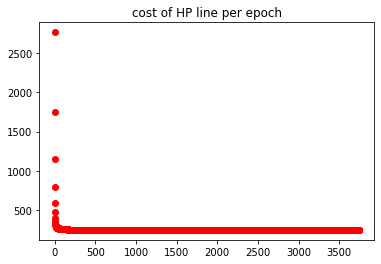

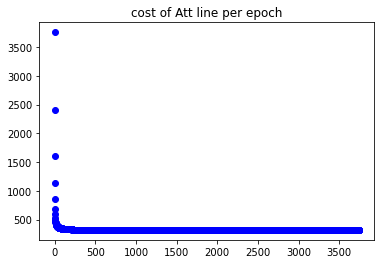

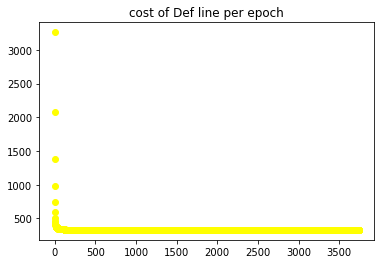

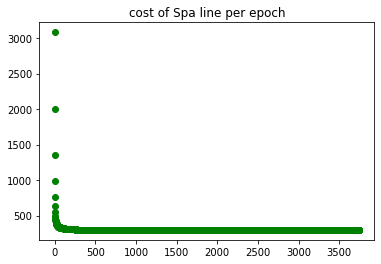

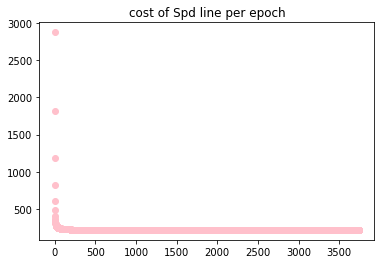

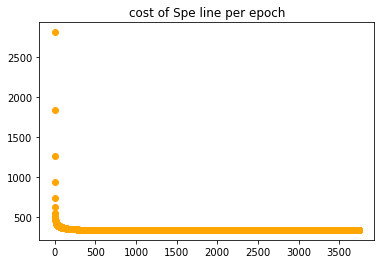

In [41]:
colors=["red","blue","yellow","green","pink","orange"]
labels=y.columns
xrange = range(len(costs[0]))
for yset in range(len(costs)):
    plt.figure()
    plt.title("cost of "+labels[yset]+" line per epoch")
    plt.scatter(x=xrange,y=costs[yset],color=colors[yset%len(costs)])
    # saving the fig locally
    if saveimages:
        plt.savefig("Cost{a}OverEpochs.png".format(a=labels[yset]))
    plt.show()

# Checking fit to full dataset

In [42]:
# transforming the full dataset by theta
fulfit = transform(X,learnTheta)
# viewing the reulting outputs
fulfit.head()

,0,1,2,3,4,5
0,52.620436,61.993190,65.385044,59.945648,61.597868,53.024207
1,52.620436,61.993190,65.385044,59.945648,61.597868,53.024207
2,77.103313,90.204101,89.735279,88.177895,88.879611,74.103224
3,74.922203,125.080946,113.669052,110.063350,97.447150,92.855798
4,53.391910,61.526359,48.407681,57.905367,55.204774,59.973589


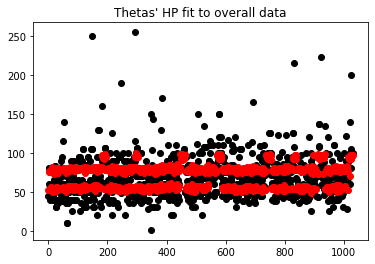

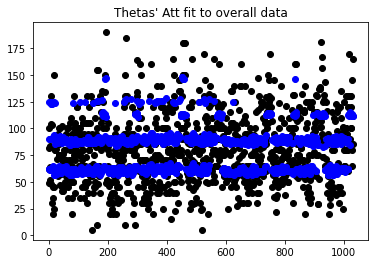

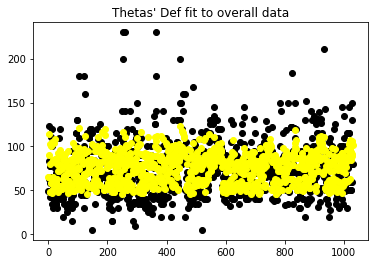

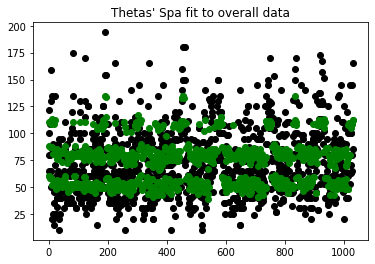

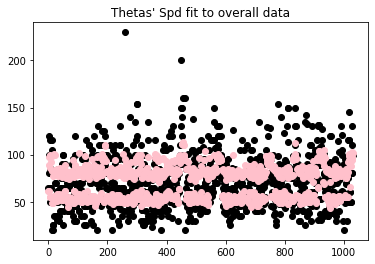

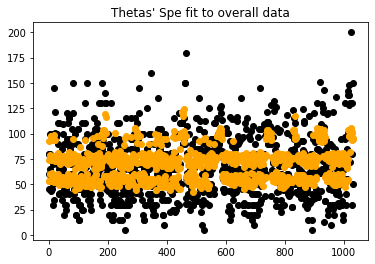

In [44]:
# plotting by entry
# x axis is entry number
# y is the value of that given stat
xrangef=range(m)
for yset in range(len(costs)):
    plt.figure()
    plt.title("Thetas' "+labels[yset]+" fit to overall data")
    # the actual value
    plt.scatter(x=xrangef,y=y[labels[yset]],color="black")
    # the predicted value
    plt.scatter(x=xrangef,y=fulfit[yset],color=colors[yset])
    if saveimages:
        plt.savefig("Fit{a}OverFull.png".format(a=labels[yset]))
    plt.show()